In [1]:
#importing_libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
from statsmodels.api import OLS
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import seaborn as sns
from seaborn import distplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#loading_dataset
df = pd.read_csv('C:/Users/Dell/Desktop/Movie.csv')
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,936,7.9,1.78,33000
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,5000,7.1,2.35,0
2,602,148,0,161,11000,200074175,275868,11700,1,994,245000000,393,6.8,2.35,85000
3,813,164,22000,23000,27000,448130642,1144337,106759,0,2701,250000000,23000,8.5,2.35,164000
4,462,132,475,530,640,73058679,212204,1873,1,738,263700000,632,6.6,2.35,24000


In [3]:
#To_check_the_missing_values_in_the_dataset
df.isnull().sum() 

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

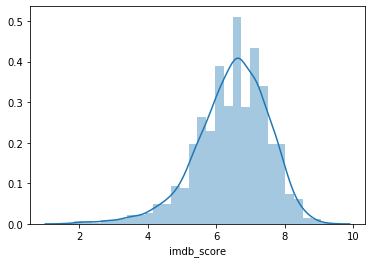

In [4]:
#Distribution_response_variable
sns.distplot(df['imdb_score'], bins=30) 
plt.show()

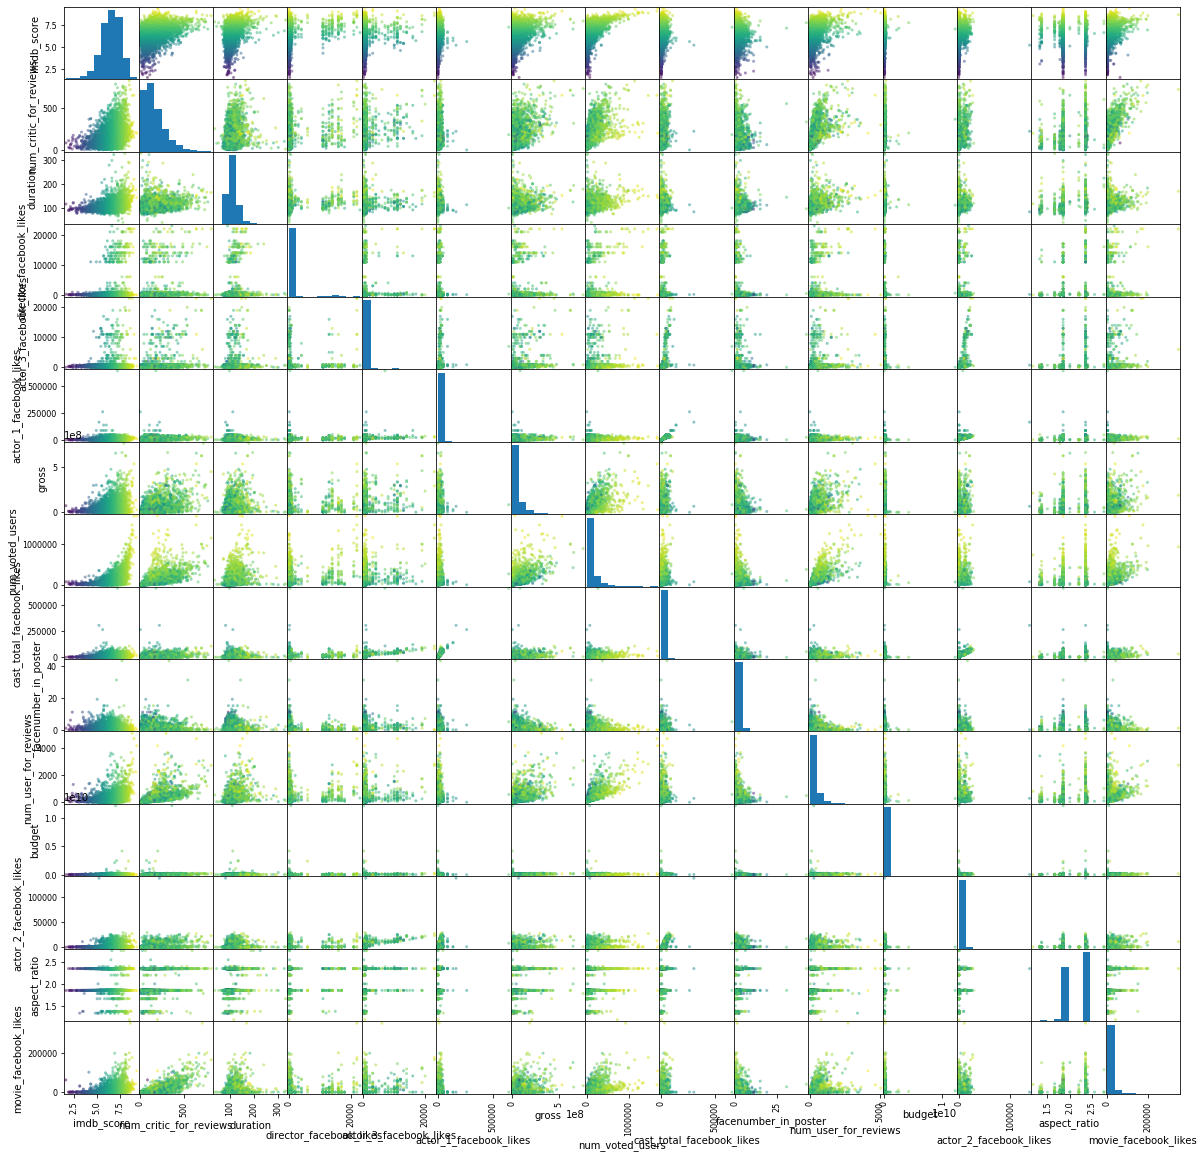

In [5]:
#Scatter_plot_matrix
x=df[['imdb_score','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']]
y=df['imdb_score']
scatter = pd.plotting.scatter_matrix(x, c=y, figsize = (20, 20))

In [6]:
#correlation_matrix
corr = x.corr()
corr

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
imdb_score,1.000000,0.348043,0.366319,0.192340,0.065577,0.093641,0.214820,0.482526,0.106857,-0.065478,0.325103,0.029207,0.102410,0.034773,0.281201
num_critic_for_reviews,0.348043,1.000000,0.228460,0.175080,0.252717,0.165878,0.464079,0.592402,0.236413,-0.034426,0.563587,0.104674,0.253051,0.250445,0.705234
duration,0.366319,0.228460,1.000000,0.180607,0.125733,0.083545,0.245614,0.339499,0.120079,0.026884,0.351489,0.067977,0.128865,0.210032,0.215239
director_facebook_likes,0.192340,0.175080,0.180607,1.000000,0.117381,0.089600,0.138310,0.299597,0.118513,-0.048080,0.217067,0.018153,0.116034,0.052546,0.161938
actor_3_facebook_likes,0.065577,0.252717,0.125733,0.117381,1.000000,0.252372,0.299817,0.267715,0.489769,0.106173,0.205284,0.039947,0.553737,0.065605,0.271477
actor_1_facebook_likes,0.093641,0.165878,0.083545,0.089600,0.252372,1.000000,0.143931,0.179519,0.944810,0.057365,0.121848,0.016393,0.391135,0.080755,0.130254
gross,0.214820,0.464079,0.245614,0.138310,0.299817,0.143931,1.000000,0.624898,0.235516,-0.032063,0.544602,0.099464,0.252786,0.093465,0.366885
num_voted_users,0.482526,0.592402,0.339499,0.299597,0.267715,0.179519,0.624898,1.000000,0.249041,-0.032246,0.778850,0.065894,0.244768,0.119890,0.517718
cast_total_facebook_likes,0.106857,0.236413,0.120079,0.118513,0.489769,0.944810,0.235516,0.249041,1.000000,0.080663,0.178576,0.028652,0.642972,0.097709,0.205514
facenumber_in_poster,-0.065478,-0.034426,0.026884,-0.048080,0.106173,0.057365,-0.032063,-0.032246,0.080663,1.000000,-0.081018,-0.021683,0.073080,0.027293,0.015165


In [7]:
import statsmodels.api as sm
X = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']]
y = df['imdb_score']

for i,predictor in enumerate(X):
    x=df[predictor]
    lm = OLS(y, sm.add_constant(x)).fit()
    print("p value is {:.5f}".format(lm.pvalues[1]))
    

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


p value is 0.00000
p value is 0.00000
p value is 0.00000
p value is 0.00006
p value is 0.00000
p value is 0.00000
p value is 0.00000
p value is 0.00000
p value is 0.00006
p value is 0.00000
p value is 0.07353
p value is 0.00000
p value is 0.03311
p value is 0.00000


In [8]:
#ANOVA_linear_model
X_dataset=df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values

In [9]:
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     137.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.98e-323
Time:                        15:48:37   Log-Likelihood:                -4755.2
No. Observations:                3755   AIC:                             9540.
Df Residuals:                    3740   BIC:                             9634.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4697      0.122     44.656      0.000       5.230       5.710
x1             0.0018      0.000      9.555      0.000       0.001       0.002
x2             0.0128      0.001     18.662      0.000       0.011       0.014
x3           6.45e-06   4.85e-06      1.331      0.183   -3.05e-06     1.6e-05
x4          7.435e-05   2.17e-05      3.426      0.001    3.18e-05       0.000
x5          7.584e-05   1.32e-05      5.744      0.000       5e-05       0.000
x6         -1.851e-09   2.72e-10     -6.795      0.000   -2.38e-09   -1.32e-09
x7          3.999e-06   1.75e-07     22.885      0.000    3.66e-06    4.34e-06
x8         -7.509e-05   1.32e-05     -5.705      0.000      -0.000   -4.93e-05
x9            -0.0302      0.007     -4.319      0.000      -0.044      -0.016
x10           -0.0006   5.82e-05     -9.960      0.000      -0.001      -0.000
x11         -6.03e-11   6.27e-11     -0.962      0.336   -1.83e-10    6.26e-11
x12         7.808e-05   1.39e-05      5.622      0.000    5.08e-05       0.000
x13           -0.3374      0.055     -6.178      0.000      -0.444      -0.230
x14        -3.092e-06   9.72e-07     -3.182      0.001      -5e-06   -1.19e-06
==============================================================================
Omnibus:                      538.373   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.560
Skew:                          -0.890   Prob(JB):                    3.35e-228
Kurtosis:                       4.878   Cond. No.                     2.15e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#checking_for_individual_predictors
X = df[['num_critic_for_reviews']]
Y = df[['imdb_score']]
linreg1 = LinearRegression()
linreg1.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg1.coef_))
print('linear model intercept (b): {}'
     .format(linreg1.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg1.score(X,Y)))

linear model coeff (w): [[0.00297829]]
linear model intercept (b): [5.96658198]
R-squared score: 0.121


In [11]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     517.3
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.20e-107
Time:                        15:48:37   Log-Likelihood:                -5291.1
No. Observations:                3755   AIC:                         1.059e+04
Df Residuals:                    3753   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.9666      0.027    219.059      0.000       5.913       6.020
num_critic_for_reviews     0.0030      0.000     22.744      0.000       0.003       0.003
==============================================================================
Omnibus:                      324.189   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.139
Skew:                          -0.674   Prob(JB):                    3.33e-105
Kurtosis:                       4.122   Cond. No.                         351.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

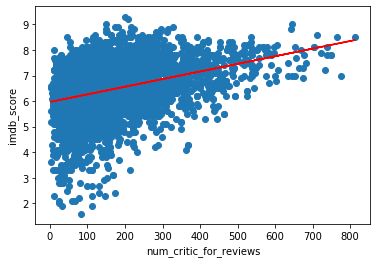

In [12]:
plt.xlabel('num_critic_for_reviews') 
plt.ylabel('imdb_score')
plt.scatter(df[['num_critic_for_reviews']],df[['imdb_score']])
plt.plot(X, linreg1.coef_ * X + linreg1.intercept_, 'r-')

In [13]:
#checking_non-linearity_for_individual_predictors
poly = PolynomialFeatures(degree=3)

In [14]:
x1 = df[['num_critic_for_reviews']]
X_poly = poly.fit_transform(x1)

In [15]:
X_dataset=df[['num_critic_for_reviews']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          8.04e-111
Time:                        15:48:37   Log-Likelihood:                -5276.9
No. Observations:                3755   AIC:                         1.056e+04
Df Residuals:                    3751   BIC:                         1.059e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7307      0.053    108.049      0.000       5.627       5.835
x1             0.0067      0.001      8.536      0.000       0.005       0.008
x2         -1.243e-05   3.03e-06     -4.109      0.000   -1.84e-05    -6.5e-06
x3          1.035e-08   3.18e-09      3.253      0.001    4.11e-09    1.66e-08
==============================================================================
Omnibus:                      324.737   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.060
Skew:                          -0.681   Prob(JB):                    6.95e-104
Kurtosis:                       4.087   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = df[['duration']]
Y = df[['imdb_score']]
linreg2 = LinearRegression()
linreg2.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg2.coef_))
print('linear model intercept (b): {}'
     .format(linreg2.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg2.score(X,Y)))

linear model coeff (w): [[0.01708625]]
linear model intercept (b): [4.5812185]
R-squared score: 0.134


In [17]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     581.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.33e-119
Time:                        15:48:37   Log-Likelihood:                -5263.0
No. Observations:                3755   AIC:                         1.053e+04
Df Residuals:                    3753   BIC:                         1.054e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5812      0.080     57.448      0.000       4.425       4.738
duration       0.0171      0.001     24.118      0.000       0.016       0.018
==============================================================================
Omnibus:                      382.242   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.350
Skew:                          -0.732   Prob(JB):                    8.79e-135
Kurtosis:                       4.344   Cond. No.                         560.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

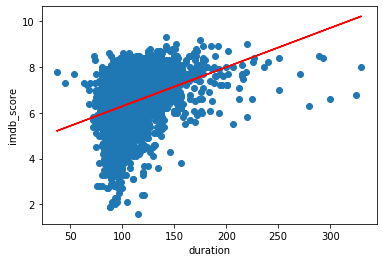

In [18]:
plt.xlabel('duration') 
plt.ylabel('imdb_score')
plt.scatter(df[['duration']],df[['imdb_score']])
plt.plot(X, linreg2.coef_ * X + linreg2.intercept_, 'r-')

In [19]:
x2 = df[['duration']]
X_poly = poly.fit_transform(x2)

In [20]:
X_dataset=df[['duration']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          8.32e-132
Time:                        15:48:38   Log-Likelihood:                -5228.5
No. Observations:                3755   AIC:                         1.046e+04
Df Residuals:                    3751   BIC:                         1.049e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9569      0.545      7.258      0.000       2.888       5.026
x1             0.0216      0.011      1.906      0.057      -0.001       0.044
x2           4.06e-05   7.34e-05      0.553      0.580      -0.000       0.000
x3         -2.506e-07   1.45e-07     -1.731      0.083   -5.34e-07    3.32e-08
==============================================================================
Omnibus:                      346.234   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.388
Skew:                          -0.673   Prob(JB):                    2.78e-123
Kurtosis:                       4.341   Cond. No.                     7.64e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X = df[['director_facebook_likes']]
Y = df[['imdb_score']]
linreg3 = LinearRegression()
linreg3.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg3.coef_))
print('linear model intercept (b): {}'
     .format(linreg3.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg3.score(X,Y)))

linear model coeff (w): [[6.62146031e-05]]
linear model intercept (b): [6.41172137]
R-squared score: 0.037


In [22]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.28e-32
Time:                        15:48:38   Log-Likelihood:                -5462.8
No. Observations:                3755   AIC:                         1.093e+04
Df Residuals:                    3753   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.4117      0.017    366.475      0.000       6.377       6.446
director_facebook_likes  6.621e-05   5.51e-06     12.007      0.000    5.54e-05     7.7e-05
==============================================================================
Omnibus:                      372.218   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.756
Skew:                          -0.741   Prob(JB):                    1.40e-123
Kurtosis:                       4.192   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

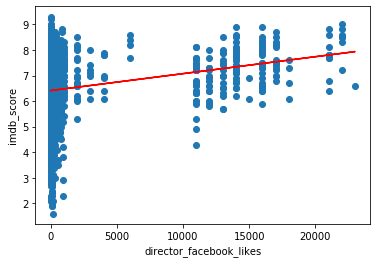

In [23]:
plt.xlabel('director_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['director_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg3.coef_ * X + linreg3.intercept_, 'r-')

In [24]:
x3 = df[['director_facebook_likes']]
X_poly = poly.fit_transform(x3)
X_dataset=df[['director_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     64.54
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.10e-40
Time:                        15:48:38   Log-Likelihood:                -5439.0
No. Observations:                3755   AIC:                         1.089e+04
Df Residuals:                    3751   BIC:                         1.091e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3527      0.020    325.347      0.000       6.314       6.391
x1             0.0005   5.94e-05      7.884      0.000       0.000       0.001
x2         -5.135e-08   7.44e-09     -6.903      0.000   -6.59e-08   -3.68e-08
x3          1.563e-12   2.32e-13      6.746      0.000    1.11e-12    2.02e-12
==============================================================================
Omnibus:                      375.330   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.037
Skew:                          -0.739   Prob(JB):                    1.84e-126
Kurtosis:                       4.230   Cond. No.                     1.09e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X = df[['actor_3_facebook_likes']]
Y = df[['imdb_score']]
linreg4 = LinearRegression()
linreg4.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg4.coef_))
print('linear model intercept (b): {}'
     .format(linreg4.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg4.score(X,Y)))

linear model coeff (w): [[3.65666453e-05]]
linear model intercept (b): [6.43698303]
R-squared score: 0.004


In [26]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.21
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.78e-05
Time:                        15:48:38   Log-Likelihood:                -5525.5
No. Observations:                3755   AIC:                         1.105e+04
Df Residuals:                    3753   BIC:                         1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4370      0.019    346.515      0.000       6.401       6.473
actor_3_facebook_likes  3.657e-05   9.08e-06      4.026      0.000    1.88e-05    5.44e-05
==============================================================================
Omnibus:                      352.357   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.680
Skew:                          -0.722   Prob(JB):                    8.63e-114
Kurtosis:                       4.116   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

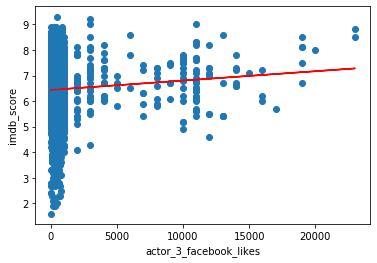

In [27]:
plt.xlabel('actor_3_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['actor_3_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg4.coef_ * X + linreg4.intercept_, 'r-')

In [28]:
x4 = df[['actor_3_facebook_likes']]
X_poly = poly.fit_transform(x4)
X_dataset=df[['actor_3_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.945
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           0.000117
Time:                        15:48:38   Log-Likelihood:                -5523.1
No. Observations:                3755   AIC:                         1.105e+04
Df Residuals:                    3751   BIC:                         1.108e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4514      0.027    235.906      0.000       6.398       6.505
x1           8.81e-06   4.91e-05      0.179      0.858   -8.75e-05       0.000
x2         -4.281e-11   7.09e-09     -0.006      0.995   -1.39e-08    1.39e-08
x3          1.386e-13   2.53e-13      0.549      0.583   -3.57e-13    6.34e-13
==============================================================================
Omnibus:                      356.836   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.305
Skew:                          -0.725   Prob(JB):                    4.25e-116
Kurtosis:                       4.136   Cond. No.                     7.55e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = df[['actor_1_facebook_likes']]
Y = df[['imdb_score']]
linreg5 = LinearRegression()
linreg5.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg5.coef_))
print('linear model intercept (b): {}'
     .format(linreg5.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg5.score(X,Y)))

linear model coeff (w): [[6.37332995e-06]]
linear model intercept (b): [6.41577876]
R-squared score: 0.009


In [30]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     33.20
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           8.98e-09
Time:                        15:48:38   Log-Likelihood:                -5517.0
No. Observations:                3755   AIC:                         1.104e+04
Df Residuals:                    3753   BIC:                         1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4158      0.019    334.353      0.000       6.378       6.453
actor_1_facebook_likes  6.373e-06   1.11e-06      5.762      0.000     4.2e-06    8.54e-06
==============================================================================
Omnibus:                      347.458   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.503
Skew:                          -0.715   Prob(JB):                    8.48e-112
Kurtosis:                       4.106   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

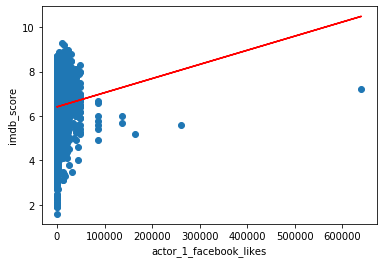

In [31]:
plt.xlabel('actor_1_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['actor_1_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg5.coef_ * X + linreg5.intercept_, 'r-')

In [32]:
x5 = df[['actor_1_facebook_likes']]
X_poly = poly.fit_transform(x5)
X_dataset=df[['actor_1_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -21.595
Model:                            OLS   Adj. R-squared:                -21.607
Method:                 Least Squares   F-statistic:                    -1793.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:39   Log-Likelihood:                -11387.
No. Observations:                3755   AIC:                         2.278e+04
Df Residuals:                    3752   BIC:                         2.280e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.644e-08   5.39e-10     49.093      0.000    2.54e-08    2.75e-08
x1             0.0004   8.57e-06     49.093      0.000       0.000       0.000
x2         -3.073e-09   1.27e-10    -24.220      0.000   -3.32e-09   -2.82e-09
x3           3.81e-15   1.86e-16     20.460      0.000    3.44e-15    4.17e-15
==============================================================================
Omnibus:                      646.775   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2586.454
Skew:                          -0.803   Prob(JB):                         0.00
Kurtosis:                       6.735   Cond. No.                     5.52e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = df[['gross']]
Y = df[['imdb_score']]
linreg6 = LinearRegression()
linreg6.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg6.coef_))
print('linear model intercept (b): {}'
     .format(linreg6.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg6.score(X,Y)))

linear model coeff (w): [[3.22700873e-09]]
linear model intercept (b): [6.2953666]
R-squared score: 0.046


In [34]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.89e-40
Time:                        15:48:39   Log-Likelihood:                -5444.8
No. Observations:                3755   AIC:                         1.089e+04
Df Residuals:                    3753   BIC:                         1.091e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2954      0.021    299.309      0.000       6.254       6.337
gross       3.227e-09   2.39e-10     13.475      0.000    2.76e-09     3.7e-09
==============================================================================
Omnibus:                      342.503   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.986
Skew:                          -0.710   Prob(JB):                    1.63e-109
Kurtosis:                       4.089   Cond. No.                     1.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

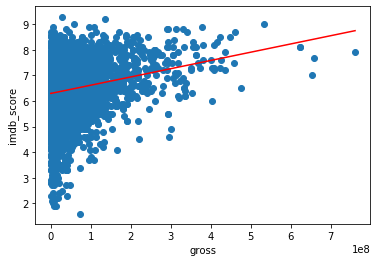

In [35]:
plt.xlabel('gross') 
plt.ylabel('imdb_score')
plt.scatter(df[['gross']],df[['imdb_score']])
plt.plot(X, linreg6.coef_ * X + linreg6.intercept_, 'r-')

In [36]:
x6 = df[['gross']]
X_poly = poly.fit_transform(x6)
X_dataset=df[['gross']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -29.715
Model:                            OLS   Adj. R-squared:                -29.723
Method:                 Least Squares   F-statistic:                    -3631.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:39   Log-Likelihood:                -11964.
No. Observations:                3755   AIC:                         2.393e+04
Df Residuals:                    3753   BIC:                         2.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.049e-32   3.67e-34     28.613      0.000    9.77e-33    1.12e-32
x1         -1.046e-24   3.66e-26    -28.613      0.000   -1.12e-24   -9.75e-25
x2          2.684e-16   9.38e-18     28.613      0.000     2.5e-16    2.87e-16
x3          -4.16e-25   1.87e-26    -22.204      0.000   -4.53e-25   -3.79e-25
==============================================================================
Omnibus:                     1991.183   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30184.739
Skew:                          -2.173   Prob(JB):                         0.00
Kurtosis:                      16.192   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
X = df[['num_voted_users']]
Y = df[['imdb_score']]
linreg7 = LinearRegression()
linreg7.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg7.coef_))
print('linear model intercept (b): {}'
     .format(linreg7.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg7.score(X,Y)))

linear model coeff (w): [[3.35245787e-06]]
linear model intercept (b): [6.11031907]
R-squared score: 0.233


In [38]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          2.68e-218
Time:                        15:48:39   Log-Likelihood:                -5035.9
No. Observations:                3755   AIC:                         1.008e+04
Df Residuals:                    3753   BIC:                         1.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.1103      0.018    332.055      0.000       6.074       6.146
num_voted_users  3.352e-06   9.93e-08     33.749      0.000    3.16e-06    3.55e-06
==============================================================================
Omnibus:                      546.826   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.330
Skew:                          -0.923   Prob(JB):                    4.07e-220
Kurtosis:                       4.746   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

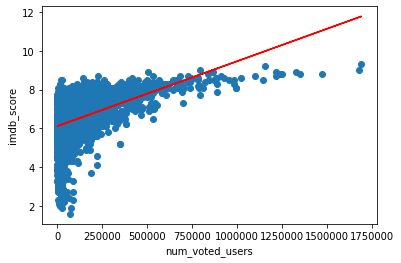

In [39]:
plt.xlabel('num_voted_users') 
plt.ylabel('imdb_score')
plt.scatter(df[['num_voted_users']],df[['imdb_score']])
plt.plot(X, linreg7.coef_ * X + linreg7.intercept_, 'r-')

In [40]:
x7 = df[['num_voted_users']]
X_poly = poly.fit_transform(x7)
X_dataset=df[['num_voted_users']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -12.262
Model:                            OLS   Adj. R-squared:                -12.269
Method:                 Least Squares   F-statistic:                    -1735.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:39   Log-Likelihood:                -10387.
No. Observations:                3755   AIC:                         2.078e+04
Df Residuals:                    3752   BIC:                         2.080e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.027e-10   9.96e-12     70.547      0.000    6.83e-10    7.22e-10
x1          6.801e-05   9.64e-07     70.547      0.000    6.61e-05    6.99e-05
x2         -1.257e-10   2.89e-12    -43.514      0.000   -1.31e-10    -1.2e-10
x3          5.733e-17   1.73e-18     33.210      0.000    5.39e-17    6.07e-17
==============================================================================
Omnibus:                      393.257   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.535
Skew:                          -0.718   Prob(JB):                    3.07e-150
Kurtosis:                       4.529   Cond. No.                     2.65e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
X = df[['cast_total_facebook_likes']]
Y = df[['imdb_score']]
linreg8 = LinearRegression()
linreg8.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg8.coef_))
print('linear model intercept (b): {}'
     .format(linreg8.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg8.score(X,Y)))

linear model coeff (w): [[5.90258129e-06]]
linear model intercept (b): [6.39713634]
R-squared score: 0.011


In [42]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     43.35
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.22e-11
Time:                        15:48:39   Log-Likelihood:                -5512.0
No. Observations:                3755   AIC:                         1.103e+04
Df Residuals:                    3753   BIC:                         1.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.3971      0.020    319.570      0.000       6.358       6.436
cast_total_facebook_likes  5.903e-06   8.97e-07      6.584      0.000    4.14e-06    7.66e-06
==============================================================================
Omnibus:                      345.481   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.418
Skew:                          -0.714   Prob(JB):                    1.08e-110
Kurtosis:                       4.094   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

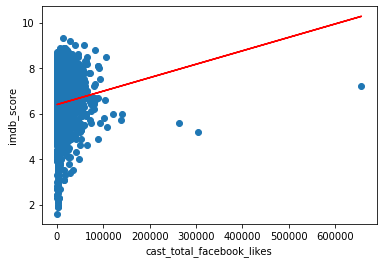

In [43]:
plt.xlabel('cast_total_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['cast_total_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg8.coef_ * X + linreg8.intercept_, 'r-')

In [44]:
x8 = df[['cast_total_facebook_likes']]
X_poly = poly.fit_transform(x8)
X_dataset=df[['cast_total_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -19.548
Model:                            OLS   Adj. R-squared:                -19.559
Method:                 Least Squares   F-statistic:                    -1785.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:40   Log-Likelihood:                -11209.
No. Observations:                3755   AIC:                         2.242e+04
Df Residuals:                    3752   BIC:                         2.244e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.703e-08   3.19e-10     53.349      0.000    1.64e-08    1.77e-08
x1             0.0003   6.31e-06     53.349      0.000       0.000       0.000
x2         -2.348e-09   8.64e-11    -27.179      0.000   -2.52e-09   -2.18e-09
x3          2.837e-15   1.24e-16     22.932      0.000    2.59e-15    3.08e-15
==============================================================================
Omnibus:                      565.997   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4132.512
Skew:                          -0.508   Prob(JB):                         0.00
Kurtosis:                       8.038   Cond. No.                     6.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = df[['facenumber_in_poster']]
Y = df[['imdb_score']]
linreg9 = LinearRegression()
linreg9.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg9.coef_))
print('linear model intercept (b): {}'
     .format(linreg9.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg9.score(X,Y)))

linear model coeff (w): [[-0.03387663]]
linear model intercept (b): [6.51185351]
R-squared score: 0.004


In [46]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.16
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.94e-05
Time:                        15:48:40   Log-Likelihood:                -5525.5
No. Observations:                3755   AIC:                         1.105e+04
Df Residuals:                    3753   BIC:                         1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.5119      0.021    313.768      0.000       6.471       6.553
facenumber_in_poster    -0.0339      0.008     -4.020      0.000      -0.050      -0.017
==============================================================================
Omnibus:                      361.258   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.140
Skew:                          -0.727   Prob(JB):                    6.94e-119
Kurtosis:                       4.167   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

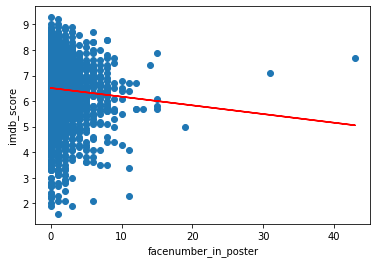

In [47]:
plt.xlabel('facenumber_in_poster') 
plt.ylabel('imdb_score')
plt.scatter(df[['facenumber_in_poster']],df[['imdb_score']])
plt.plot(X, linreg9.coef_ * X + linreg9.intercept_, 'r-')

In [48]:
x9 = df[['facenumber_in_poster']]
X_poly = poly.fit_transform(x9)
X_dataset=df[['facenumber_in_poster']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     8.656
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.01e-05
Time:                        15:48:40   Log-Likelihood:                -5520.6
No. Observations:                3755   AIC:                         1.105e+04
Df Residuals:                    3751   BIC:                         1.107e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5306      0.024    276.163      0.000       6.484       6.577
x1            -0.0513      0.020     -2.600      0.009      -0.090      -0.013
x2             0.0005      0.003      0.188      0.851      -0.005       0.006
x3          3.205e-05   6.28e-05      0.510      0.610   -9.11e-05       0.000
==============================================================================
Omnibus:                      367.205   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.417
Skew:                          -0.735   Prob(JB):                    2.47e-121
Kurtosis:                       4.178   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
X = df[['num_user_for_reviews']]
Y = df[['imdb_score']]
linreg10 = LinearRegression()
linreg10.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg10.coef_))
print('linear model intercept (b): {}'
     .format(linreg10.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg10.score(X,Y)))

linear model coeff (w): [[0.0008351]]
linear model intercept (b): [6.18382278]
R-squared score: 0.106


In [50]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     443.5
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.69e-93
Time:                        15:48:40   Log-Likelihood:                -5323.8
No. Observations:                3755   AIC:                         1.065e+04
Df Residuals:                    3753   BIC:                         1.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1838      0.021    293.360      0.000       6.142       6.225
num_user_for_reviews     0.0008   3.97e-05     21.060      0.000       0.001       0.001
==============================================================================
Omnibus:                      542.703   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.161
Skew:                          -0.945   Prob(JB):                    2.58e-205
Kurtosis:                       4.565   Cond. No.                         687.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

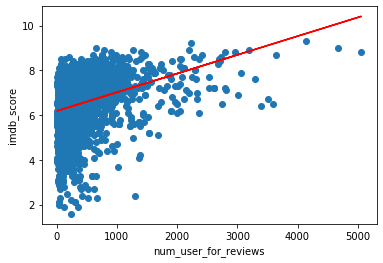

In [51]:
plt.xlabel('num_user_for_reviews') 
plt.ylabel('imdb_score')
plt.scatter(df[['num_user_for_reviews']],df[['imdb_score']])
plt.plot(X, linreg10.coef_ * X + linreg10.intercept_, 'r-')

In [52]:
x10 = df[['num_user_for_reviews']]
X_poly = poly.fit_transform(x10)
X_dataset=df[['num_user_for_reviews']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          7.09e-115
Time:                        15:48:40   Log-Likelihood:                -5267.5
No. Observations:                3755   AIC:                         1.054e+04
Df Residuals:                    3751   BIC:                         1.057e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9572      0.030    198.070      0.000       5.898       6.016
x1             0.0021      0.000     15.762      0.000       0.002       0.002
x2         -9.133e-07   1.09e-07     -8.352      0.000   -1.13e-06   -6.99e-07
x3          1.284e-10   2.08e-11      6.161      0.000    8.75e-11    1.69e-10
==============================================================================
Omnibus:                      618.027   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.793
Skew:                          -1.012   Prob(JB):                    3.22e-258
Kurtosis:                       4.867   Cond. No.                     7.11e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X = df[['budget']]
Y = df[['imdb_score']]
linreg11 = LinearRegression()
linreg11.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg11.coef_))
print('linear model intercept (b): {}'
     .format(linreg11.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg11.score(X,Y)))

linear model coeff (w): [[1.364979e-10]]
linear model intercept (b): [6.45888018]
R-squared score: 0.001


In [54]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.204
Date:                Tue, 03 Dec 2019   Prob (F-statistic):             0.0735
Time:                        15:48:40   Log-Likelihood:                -5531.9
No. Observations:                3755   AIC:                         1.107e+04
Df Residuals:                    3753   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4589      0.018    367.168      0.000       6.424       6.493
budget      1.365e-10   7.63e-11      1.790      0.074    -1.3e-11    2.86e-10
==============================================================================
Omnibus:                      354.394   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.092
Skew:                          -0.721   Prob(JB):                    2.12e-115
Kurtosis:                       4.138   Cond. No.                     2.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

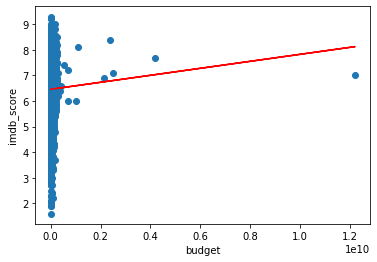

In [55]:
plt.xlabel('budget') 
plt.ylabel('imdb_score')
plt.scatter(df[['budget']],df[['imdb_score']])
plt.plot(X, linreg11.coef_ * X + linreg11.intercept_, 'r-')

In [56]:
x11 = df[['budget']]
X_poly = poly.fit_transform(x11)
X_dataset=df[['budget']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -37.349
Model:                            OLS   Adj. R-squared:                -37.360
Method:                 Least Squares   F-statistic:                    -3655.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:41   Log-Likelihood:                -12380.
No. Observations:                3755   AIC:                         2.476e+04
Df Residuals:                    3753   BIC:                         2.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.052e-37   9.57e-38      3.188      0.001    1.18e-37    4.93e-37
x1          1.319e-25   4.14e-26      3.188      0.001    5.08e-26    2.13e-25
x2          1.488e-18   4.67e-19      3.188      0.001    5.73e-19     2.4e-18
x3         -1.181e-28   3.85e-29     -3.068      0.002   -1.94e-28   -4.26e-29
==============================================================================
Omnibus:                     1643.945   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31223.979
Skew:                          -1.608   Prob(JB):                         0.00
Kurtosis:                      16.756   Cond. No.                     1.37e+30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+30. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X = df[['actor_2_facebook_likes']]
Y = df[['imdb_score']]
linreg12 = LinearRegression()
linreg12.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg12.coef_))
print('linear model intercept (b): {}'
     .format(linreg12.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg12.score(X,Y)))

linear model coeff (w): [[2.38005401e-05]]
linear model intercept (b): [6.41706198]
R-squared score: 0.010


In [58]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     39.78
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.18e-10
Time:                        15:48:41   Log-Likelihood:                -5513.7
No. Observations:                3755   AIC:                         1.103e+04
Df Residuals:                    3753   BIC:                         1.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6.4171      0.019    341.844      0.000       6.380       6.454
actor_2_facebook_likes   2.38e-05   3.77e-06      6.307      0.000    1.64e-05    3.12e-05
==============================================================================
Omnibus:                      360.354   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.334
Skew:                          -0.726   Prob(JB):                    1.04e-118
Kurtosis:                       4.169   Cond. No.                     5.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

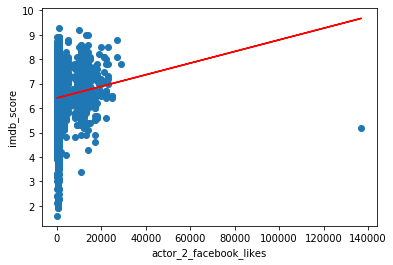

In [59]:
plt.xlabel('actor_2_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['actor_2_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg12.coef_ * X + linreg12.intercept_, 'r-')

In [60]:
x12 = df[['actor_2_facebook_likes']]
X_poly = poly.fit_transform(x12)
X_dataset=df[['actor_2_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     21.33
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.07e-13
Time:                        15:48:41   Log-Likelihood:                -5501.8
No. Observations:                3755   AIC:                         1.101e+04
Df Residuals:                    3751   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4009      0.022    293.561      0.000       6.358       6.444
x1          2.992e-05   1.48e-05      2.020      0.043    8.86e-07     5.9e-05
x2          3.297e-10   9.92e-10      0.332      0.740   -1.61e-09    2.27e-09
x3          -4.47e-15   6.51e-15     -0.686      0.493   -1.72e-14     8.3e-15
==============================================================================
Omnibus:                      338.483   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.934
Skew:                          -0.702   Prob(JB):                    1.24e-108
Kurtosis:                       4.098   Cond. No.                     5.35e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X = df[['aspect_ratio']]
Y = df[['imdb_score']]
linreg13 = LinearRegression()
linreg13.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg13.coef_))
print('linear model intercept (b): {}'
     .format(linreg13.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg13.score(X,Y)))

linear model coeff (w): [[0.13568462]]
linear model intercept (b): [6.17926276]
R-squared score: 0.001


In [62]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.543
Date:                Tue, 03 Dec 2019   Prob (F-statistic):             0.0331
Time:                        15:48:41   Log-Likelihood:                -5531.3
No. Observations:                3755   AIC:                         1.107e+04
Df Residuals:                    3753   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1793      0.135     45.689      0.000       5.914       6.444
aspect_ratio     0.1357      0.064      2.132      0.033       0.011       0.260
==============================================================================
Omnibus:                      343.834   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.072
Skew:                          -0.708   Prob(JB):                    4.72e-111
Kurtosis:                       4.115   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

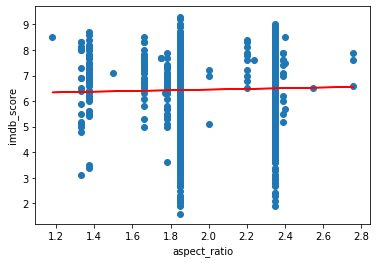

In [63]:
plt.xlabel('aspect_ratio') 
plt.ylabel('imdb_score')
plt.scatter(df[['aspect_ratio']],df[['imdb_score']])
plt.plot(X, linreg13.coef_ * X + linreg13.intercept_, 'r-')

In [64]:
x13 = df[['aspect_ratio']]
X_poly = poly.fit_transform(x13)
X_dataset=df[['aspect_ratio']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     9.584
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           2.66e-06
Time:                        15:48:41   Log-Likelihood:                -5519.2
No. Observations:                3755   AIC:                         1.105e+04
Df Residuals:                    3751   BIC:                         1.107e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9524      6.750      1.030      0.303      -6.282      20.187
x1             2.6368     11.216      0.235      0.814     -19.354      24.627
x2            -3.0356      6.105     -0.497      0.619     -15.005       8.934
x3             0.7805      1.087      0.718      0.473      -1.351       2.912
==============================================================================
Omnibus:                      347.890   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.430
Skew:                          -0.713   Prob(JB):                    1.19e-112
Kurtosis:                       4.123   Cond. No.                     9.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
X = df[['movie_facebook_likes']]
Y = df[['imdb_score']]
linreg14 = LinearRegression()
linreg14.fit(X,Y)
print('linear model coeff (w): {}'
     .format(linreg14.coef_))
print('linear model intercept (b): {}'
     .format(linreg14.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg14.score(X,Y)))

linear model coeff (w): [[1.38388095e-05]]
linear model intercept (b): [6.3357138]
R-squared score: 0.079


In [66]:
x = X.iloc[:].values
y = Y.iloc[:].values
X_with_const=sm.add_constant(X)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     322.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.40e-69
Time:                        15:48:41   Log-Likelihood:                -5378.9
No. Observations:                3755   AIC:                         1.076e+04
Df Residuals:                    3753   BIC:                         1.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.3357      0.018    351.020      0.000       6.300       6.371
movie_facebook_likes  1.384e-05   7.71e-07     17.951      0.000    1.23e-05    1.54e-05
==============================================================================
Omnibus:                      427.839   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.629
Skew:                          -0.803   Prob(JB):                    2.92e-150
Kurtosis:                       4.349   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

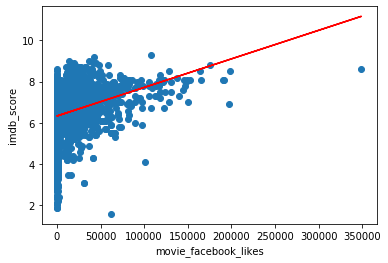

In [67]:
plt.xlabel('movie_facebook_likes') 
plt.ylabel('imdb_score')
plt.scatter(df[['movie_facebook_likes']],df[['imdb_score']])
plt.plot(X, linreg14.coef_ * X + linreg14.intercept_, 'r-')

In [68]:
x14 = df[['movie_facebook_likes']]
X_poly = poly.fit_transform(x14)
X_dataset=df[['movie_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           9.07e-83
Time:                        15:48:42   Log-Likelihood:                -5341.7
No. Observations:                3755   AIC:                         1.069e+04
Df Residuals:                    3751   BIC:                         1.072e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2774      0.019    328.561      0.000       6.240       6.315
x1          2.983e-05   2.07e-06     14.398      0.000    2.58e-05    3.39e-05
x2         -2.134e-10   2.89e-11     -7.385      0.000    -2.7e-10   -1.57e-10
x3          4.403e-16   7.92e-17      5.561      0.000    2.85e-16    5.96e-16
==============================================================================
Omnibus:                      445.771   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.005
Skew:                          -0.827   Prob(JB):                    6.09e-158
Kurtosis:                       4.376   Cond. No.                     9.07e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#adding_polynomial_features_for_the_whole_dataset_degree=3
X_poly = poly.fit_transform(x)

In [70]:
X_dataset=df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']]
y_dataset=df[['imdb_score']]
X=X_dataset.iloc[:].values
y=y_dataset.iloc[:].values
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_dataset)
X_with_const=sm.add_constant(X_F1_poly)
model=sm.OLS(endog=y,exog=X_with_const)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -23.320
Model:                            OLS   Adj. R-squared:                -23.755
Method:                 Least Squares   F-statistic:                    -53.58
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               1.00
Time:                        15:48:43   Log-Likelihood:                -11525.
No. Observations:                3755   AIC:                         2.318e+04
Df Residuals:                    3688   BIC:                         2.360e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.684e-15   5.59e-17     30.118      0.000    1.57e-15    1.79e-15
x1         -9.984e-16    1.2e-16     -8.297      0.000   -1.23e-15   -7.62e-16
x2         -6.124e-18   3.33e-19    -18.408      0.000   -6.78e-18   -5.47e-18
x3          -1.46e-18   1.54e-19     -9.474      0.000   -1.76e-18   -1.16e-18
x4            9.9e-19   4.78e-20     20.715      0.000    8.96e-19    1.08e-18
x5           3.31e-21    1.3e-22     25.365      0.000    3.05e-21    3.57e-21
x6          1.505e-20    4.6e-22     32.729      0.000    1.41e-20    1.59e-20
x7         -7.448e-21   3.87e-22    -19.254      0.000   -8.21e-21   -6.69e-21
x8          2.122e-21   8.45e-23     25.116      0.000    1.96e-21    2.29e-21
x9         -2.666e-22   2.18e-23    -12.203      0.000   -3.09e-22   -2.24e-22
x10         2.699e-21   1.97e-22     13.689      0.000    2.31e-21    3.09e-21
x11         1.652e-20   4.98e-22     33.155      0.000    1.55e-20    1.75e-20
x12         2.775e-22   1.31e-23     21.190      0.000    2.52e-22    3.03e-22
x13         2.647e-22   1.88e-23     14.107      0.000    2.28e-22    3.01e-22
x14         1.298e-22   8.78e-24     14.778      0.000    1.13e-22    1.47e-22
x15        -3.653e-22   1.37e-23    -26.619      0.000   -3.92e-22   -3.38e-22
x16          2.08e-22   7.69e-24     27.031      0.000    1.93e-22    2.23e-22
x17         4.032e-23   4.05e-24      9.944      0.000    3.24e-23    4.83e-23
x18         3.696e-23   4.94e-24      7.477      0.000    2.73e-23    4.67e-23
x19         6.823e-22   3.73e-23     18.271      0.000    6.09e-22    7.55e-22
x20         1.475e-18   6.71e-20     21.960      0.000    1.34e-18    1.61e-18
x21         5.625e-21   2.84e-22     19.780      0.000    5.07e-21    6.18e-21
x22         9.787e-22   3.16e-23     31.002      0.000    9.17e-22    1.04e-21
x23         7.914e-25   2.57e-25      3.080      0.002    2.88e-25     1.3e-24
x24          2.42e-23   1.42e-24     16.987      0.000    2.14e-23     2.7e-23
x25         1.494e-18   6.43e-20     23.252      0.000    1.37e-18    1.62e-18
x26         1.892e-22   1.63e-23     11.592      0.000    1.57e-22    2.21e-22
x27         1.195e-24    5.4e-26     22.131      0.000    1.09e-24     1.3e-24
x28         6.812e-22    6.9e-23      9.876      0.000    5.46e-22    8.16e-22
x29         9.979e-24   2.76e-25     36.170      0.000    9.44e-24    1.05e-23
x30         3.448e-23   1.39e-24     24.754      0.000    3.17e-23    3.72e-23
x31         4.052e-23      2e-24     20.285      0.000    3.66e-23    4.44e-23
x32         6.235e-22   2.16e-23     28.832      0.000    5.81e-22    6.66e-22
x33         1.627e-18   4.65e-20     34.991      0.000    1.54e-18    1.72e-18
x34         4.023e-21    1.2e-22     33.660      0.000    3.79e-21    4.26e-21
x35         9.131e-22   2.97e-23     30.760      0.000    8.55e-22    9.71e-22
x3

In [71]:
#scaling_predictors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
#fitting_linear_regression_model
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train_scaled, y_train)
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

linear model intercept (b): [5.51575427]
linear model coeff (w): [[  1.45804887   3.93717631   0.1439692    1.31951369  41.30640203
   -1.33909696   6.81657558 -41.58285574  -1.39618545  -3.12902572
   -0.28769263   8.88940841  -0.59230802  -0.90591726]]
R-squared score (training): 0.349
R-squared score (test): 0.305


In [73]:
#regularization_of_linear_model
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Movie Review')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Movie Review
ridge regression linear model intercept: [5.84421001]
ridge regression linear model coeff:
[[ 1.09248328  1.74580019  0.4869718  -0.30018417  0.10262537 -0.04426676
   1.98336082  0.06552954 -0.2939946   0.34254002  0.00329545  0.01262888
  -0.33828773  0.34679958]]
R-squared score (training): 0.264
R-squared score (test): 0.240
Number of non-zero features: 14


In [74]:
#checking_optimal_hyperparameter
alpha=[0, 1, 5, 10, 20, 50, 100, 1000]
train_score_list=[]
test_score_list=[]
for thisalpha in [0, 1, 5, 10, 20, 50, 100, 1000]:
        linridge = Ridge(alpha = thisalpha).fit(X_train_scaled, y_train)
        print(thisalpha)
        train_score = linridge.score(X_train_scaled, y_train)
        train_score_list.append(train_score)
        test_score = linridge.score(X_test_scaled, y_test)
        test_score_list.append(test_score)
        print(train_score)
        print(test_score)

0
0.3491109118876865
0.3046401345340308
1
0.34118225331952035
0.29619947108111744
5
0.3167820710535122
0.2802938441777105
10
0.29380742955229855
0.26321128291810414
20
0.2638350258579196
0.24040332810091858
50
0.21486269581287845
0.2013967151584285
100
0.17050875326597956
0.16312560617361926
1000
0.03784782580742452
0.03713655876262123


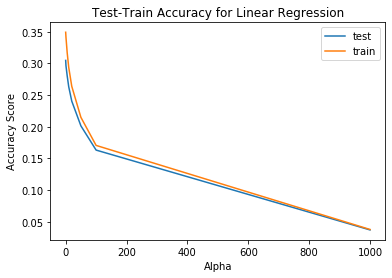

In [75]:
#test_train_accuracy_linear_model
plt.plot(alpha, test_score_list, label = 'test')
plt.plot(alpha,train_score_list,label='train')
plt.legend()
plt.title('Test-Train Accuracy for Linear Regression')
plt.xlabel('Alpha')
plt.ylabel('Accuracy Score')

plt.show()

In [76]:
#fitting_neural_regressor
alpha=[0, 1, 5, 10, 20, 50, 100, 1000]
train_score_list=[]
test_score_list=[]
for thisalpha in [0, 1, 5, 10, 20, 50, 100, 1000]:
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)
        print(thisalpha)
        train_score = mlpreg.score(X_train_scaled, y_train)
        train_score_list.append(train_score)
        test_score = mlpreg.score(X_test_scaled, y_test)
        test_score_list.append(test_score)
        print(train_score)
        print(test_score)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
0.4808460261709418
0.4186594024493937


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
0.46341805745305686
0.39802524185612675


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
0.4400329439354528
0.3765621323622782


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
0.4275600427837326
0.3725924728120248


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
0.371710642221387
0.32570836953731874


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50
0.31267967296041077
0.2775610919161212


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100
0.24638302650862054
0.2268164944016975


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1000
-1.5129617558784503e-09
-0.00038614785880364266


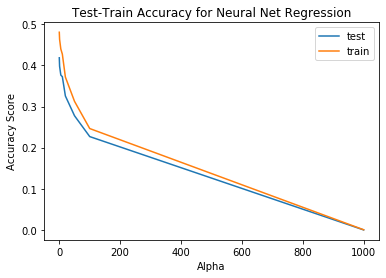

In [77]:
#test_train_accuracy_neural_network_regressor_model
plt.plot(alpha, test_score_list, label = 'test')
plt.plot(alpha,train_score_list,label='train')
plt.legend()
plt.title('Test-Train Accuracy for Neural Net Regression')
plt.xlabel('Alpha')
plt.ylabel('Accuracy Score')

plt.show()

In [78]:
(mlpreg.coefs_)

[array([[ 3.42902214e-07, -3.01659613e-05,  7.04751674e-07, ...,
          3.77313732e-06, -2.32243114e-05,  1.24953193e-06],
        [ 1.35587326e-06, -1.52424230e-05,  1.32390216e-06, ...,
          2.17554418e-06, -9.26597592e-06, -6.02010473e-08],
        [-1.17829047e-06, -1.57362827e-05,  7.31522912e-09, ...,
          1.50988343e-06, -1.38831675e-05, -1.38437800e-06],
        ...,
        [ 4.93490894e-08, -5.84586879e-07, -1.05794548e-07, ...,
          1.08520899e-06, -2.69132387e-06, -1.38679904e-06],
        [-3.85959694e-06, -6.20576604e-06, -9.65393272e-07, ...,
          3.86212129e-06, -8.98026403e-06,  1.05217206e-06],
        [ 1.30740165e-06, -1.11073189e-05, -8.67040423e-07, ...,
         -5.35895877e-07, -9.19534185e-06,  1.03256397e-06]]),
 array([[-4.20844658e-07,  3.00308437e-06, -4.42964537e-07, ...,
          2.89086628e-06,  1.37445539e-06,  5.19275956e-07],
        [ 8.30082086e-07,  3.90984953e-06, -6.25526984e-08, ...,
         -8.44698926e-06,  4.76666951e

In [79]:
#creating_dummy_variable_imdb_score
pred=[]
for x in df['imdb_score']:
    if x>7:
        pred.append(1)
    else:
        pred.append(0)
pred=np.array(pred)
pred

array([1, 1, 0, ..., 0, 0, 0])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, pred,
                                                   random_state = 0)

In [81]:
#fitting_logistic_regression
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
print('Movie Reveiw')
print('Accuracy of Logistic regression classifier: {:.3f}'
     .format(clf.score(X_scaled, pred)))
print('Logistic model intercept (b): {}'
     .format(clf.intercept_))
print('Logistic model coeff:\n{}'
     .format(clf.coef_))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Movie Reveiw
Accuracy of Logistic regression classifier: 0.769
Logistic model intercept (b): [-1.93765668]
Logistic model coeff:
[[ 1.76783997  5.17215734  1.03527905 -0.85402935  0.21701776 -2.61064492
   8.24228885 -0.06133933 -1.77385843  0.68197468 -0.49528024 -0.39106511
  -1.7037716   1.91025983]]
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.76


In [82]:
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[612  32]
 [195 100]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       644
           1       0.76      0.34      0.47       295

    accuracy                           0.76       939
   macro avg       0.76      0.64      0.66       939
weighted avg       0.76      0.76      0.73       939



In [107]:
#regularization_of_logistic_regression
logridge = LogisticRegression(C=20, solver='lbfgs').fit(X_train, y_train)

print('Movie Review')
print('ridge regression logistic model intercept: {}'
     .format(logridge.intercept_))
print('ridge regression logistic model coeff:\n{}'
     .format(logridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(logridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(logridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(logridge.coef_ != 0)))

Movie Review
ridge regression logistic model intercept: [-0.94864357]
ridge regression logistic model coeff:
[[ 3.77521804  4.19080517  0.27575129  1.38672816 -4.87222905  7.22643505]]
R-squared score (training): 0.764
R-squared score (test): 0.747
Number of non-zero features: 6


In [108]:
#checking_for_optimal_hyperparameter
alpha=[1, 5, 10, 20, 50, 100, 1000]
train_score_list=[]
test_score_list=[]
for thisalpha in [1, 5, 10, 20, 50, 100, 1000]:
        logridge = LogisticRegression(C=thisalpha, solver='lbfgs').fit(X_train, y_train)
        print(thisalpha)
        train_score = logridge.score(X_train, y_train)
        train_score_list.append(train_score)
        test_score = logridge.score(X_test, y_test)
        test_score_list.append(test_score)
        print(train_score)
        print(test_score)

1
0.7602982954545454
0.7454739084132055
5
0.7634943181818182
0.7433439829605963
10
0.7649147727272727
0.744408945686901
20
0.7638494318181818
0.7465388711395101
50
0.7638494318181818
0.7465388711395101
100
0.7638494318181818
0.7465388711395101
1000
0.7642045454545454
0.7465388711395101


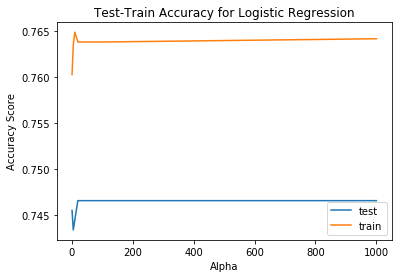

In [109]:
#checking_test_train_accuracy_logistic_regression
plt.plot(alpha, test_score_list, label = 'test')
plt.plot(alpha,train_score_list,label='train')
plt.legend()
plt.title('Test-Train Accuracy for Logistic Regression')
plt.xlabel('Alpha')
plt.ylabel('Accuracy Score')

plt.show()

In [86]:
#fitting_neural_network_classifier
clf2 = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train, y_train)

print('Movie Review dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Movie Review dataset
Accuracy of NN classifier on training set: 0.81
Accuracy of NN classifier on test set: 0.77


In [87]:
predictions = clf2.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[595  49]
 [166 129]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       644
           1       0.72      0.44      0.55       295

    accuracy                           0.77       939
   macro avg       0.75      0.68      0.70       939
weighted avg       0.76      0.77      0.75       939



In [88]:
#checking_for_optimal_hyperparameter
alpha=[0,1,5,10,20,30,40,50,60,70,80,90,100]
train_score_list=[]
test_score_list=[]
for thisalpha in (0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
        clf2 = MLPClassifier(hidden_layer_sizes = [100,100],
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        print(thisalpha)
        train_score = clf2.score(X_train, y_train)
        train_score_list.append(train_score)
        test_score  = clf2.score(X_test, y_test)
        test_score_list.append(test_score)
        print(train_score)
        print(test_score)

0
0.8174715909090909
0.7859424920127795
1
0.8167613636363636
0.7806176783812566
5
0.7887073863636364
0.7614483493077743
10
0.7901278409090909
0.7667731629392971
20
0.77734375
0.7603833865814696
30
0.7674005681818182
0.7539936102236422
40
0.7585227272727273
0.7486687965921193
50
0.6977982954545454
0.6858359957401491
60
0.6977982954545454
0.6858359957401491
70
0.6977982954545454
0.6858359957401491
80
0.6977982954545454
0.6858359957401491
90
0.6977982954545454
0.6858359957401491
100
0.6977982954545454
0.6858359957401491


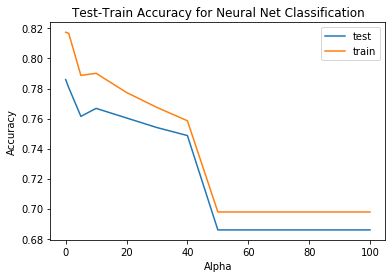

In [89]:
#test_train_accuracy_neural_net_classification
plt.plot(alpha, test_score_list, label = 'test')
plt.plot(alpha,train_score_list,label='train')
plt.legend()
plt.title('Test-Train Accuracy for Neural Net Classification')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

plt.show()

In [90]:
#cross_validation_score_neural_net_regression
mlpreg = MLPRegressor(hidden_layer_sizes = [100,100], alpha = 10,solver = 'lbfgs').fit(X_scaled, y)
cv_scores = cross_val_score(mlpreg, X_scaled, y,cv=5)
print('Neural Net Regression')
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Neural Net Regression
Cross-validation scores (5-fold): [ 0.35684012  0.43830233  0.42945894  0.3864901  -0.03172856]
Mean cross-validation score (5-fold): 0.316


In [91]:
#cross_validation_score_neural_net_classification
clf2 = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,random_state = 0, solver='lbfgs').fit(X_scaled, pred)
cv_scores = cross_val_score(clf2, X_scaled, pred,cv=5)
print('Neural Net Classification')
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Neural Net Classification
Cross-validation scores (5-fold): [0.77526596 0.79893475 0.80026631 0.77097204 0.768     ]
Mean cross-validation score (5-fold): 0.783


In [110]:
#cross_validation_score_logistic_regression
logridge = LogisticRegression(C=thisalpha, solver='lbfgs').fit(X_train, y_train)
cv_scores = cross_val_score(logridge, X_scaled, pred,cv=5)
print('Logistic Regression')
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Logistic Regression
Cross-validation scores (5-fold): [0.77925532 0.80026631 0.79627164 0.75898802 0.748     ]
Mean cross-validation score (5-fold): 0.777


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

In [93]:
#cross_validation_score_linear_regression
linridge = Ridge(alpha=20.0).fit(X_scaled, y)
cv_scores = cross_val_score(linridge, X_scaled, y,cv=5)
print('Linear Regression')
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Linear Regression
Cross-validation scores (5-fold): [ 0.26424576  0.30441186  0.26350789  0.24352153 -0.00802289]
Mean cross-validation score (5-fold): 0.214


In [114]:
#optimal_hyperparameter_for_best_model_neural_net_classification
alpha=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
score_list=[]
cv_scores_list1=[]
for thisalpha in (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
        clf3 = MLPClassifier(hidden_layer_sizes = [100,100],
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_scaled, pred)
        print(thisalpha)
        score = clf3.score(X_scaled, pred)
        print(score)
        score_list.append(score)
        cv_scores = cross_val_score(clf3, X_scaled, pred,cv=5)
        cv_scores_list1.append(np.mean(cv_scores))
        print('Cross-validation scores (5-fold):', cv_scores)
        print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))


1
0.8162450066577897
Cross-validation scores (5-fold): [0.77526596 0.80159787 0.81757656 0.7816245  0.78      ]
Mean cross-validation score (5-fold): 0.791
5
0.8013315579227697
Cross-validation scores (5-fold): [0.77925532 0.79893475 0.79627164 0.76830892 0.764     ]
Mean cross-validation score (5-fold): 0.781
10
0.7898801597869507
Cross-validation scores (5-fold): [0.76861702 0.79094541 0.70039947 0.75898802 0.74666667]
Mean cross-validation score (5-fold): 0.753
20
0.7802929427430093
Cross-validation scores (5-fold): [0.76728723 0.79094541 0.79360852 0.75366178 0.73733333]
Mean cross-validation score (5-fold): 0.769
30
0.770439414114514
Cross-validation scores (5-fold): [0.76329787 0.7723036  0.78961385 0.74833555 0.72666667]
Mean cross-validation score (5-fold): 0.760
40
0.7645805592543276
Cross-validation scores (5-fold): [0.75930851 0.69507324 0.69507324 0.73901465 0.69466667]
Mean cross-validation score (5-fold): 0.717
50
0.6948069241011984
Cross-validation scores (5-fold): [0.69

In [115]:
#optimal_hyperparameter_for_best_model_neural_net_classification
alpha=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
score_list1=[]
cv_scores_list2=[]
for thisalpha in (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
        clf4 = MLPRegressor(hidden_layer_sizes = [100,100],
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_scaled, y)
        print(thisalpha)
        score = clf4.score(X_scaled, y)
        print(score)
        score_list1.append(score)
        cv_scores = cross_val_score(clf4, X_scaled, y,cv=5)
        cv_scores_list2.append(np.mean(cv_scores))
        print('Cross-validation scores (5-fold):', cv_scores)
        print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
0.46326106909287357


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [0.38725037 0.45376124 0.47651868 0.44010975 0.06923436]
Mean cross-validation score (5-fold): 0.365


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
0.39681779746485346


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.3548147   0.43090872  0.44389412  0.41087929 -0.01291483]
Mean cross-validation score (5-fold): 0.326


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10
0.38933389934251583


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.36255848  0.42048342  0.42520009  0.38499086 -0.01863123]
Mean cross-validation score (5-fold): 0.315


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20
0.3755381630987016


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.34324111  0.42880021  0.3856473   0.35836992 -0.01038749]
Mean cross-validation score (5-fold): 0.301


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30
0.3591024832915266


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.32738886  0.41319931  0.37729484  0.31024676 -0.013017  ]
Mean cross-validation score (5-fold): 0.283


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40
0.35050108113563094


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [0.25533564 0.38720613 0.32657165 0.3276376  0.00225099]
Mean cross-validation score (5-fold): 0.260


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50
0.3385336328248203


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.24317288  0.37960913  0.3222097   0.30077089 -0.00392225]
Mean cross-validation score (5-fold): 0.248


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60
0.31623480899275835


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.26967371  0.3511067   0.29721878  0.28761549 -0.01193807]
Mean cross-validation score (5-fold): 0.239


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70
0.2944518852930217


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.24259917  0.34117272  0.28104631  0.27060558 -0.0131018 ]
Mean cross-validation score (5-fold): 0.224


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80
0.29671856685143017


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.25113634  0.31294663  0.26475691  0.2538431  -0.01087898]
Mean cross-validation score (5-fold): 0.214


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90
0.27505871393978476


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.25849552  0.29699257  0.25194195  0.2353566  -0.01191037]
Mean cross-validation score (5-fold): 0.206


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100
0.27078824219622977


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was pass

Cross-validation scores (5-fold): [ 0.2676305   0.27902797  0.23247052  0.22227011 -0.01029984]
Mean cross-validation score (5-fold): 0.198


In [111]:
#optimal_hyperparameter_for_best_model_neural_net_classification
alpha=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
score_list2=[]
cv_scores_list3=[]
for thisalpha in (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
        logridge = LogisticRegression(C=thisalpha, solver='lbfgs').fit(X_scaled, pred)        
        print(thisalpha)
        score = logridge.score(X_scaled, pred)
        print(score)
        score_list2.append(score)
        cv_scores = cross_val_score(logridge, X_scaled, pred,cv=5)
        cv_scores_list3.append(np.mean(cv_scores))
        print('Cross-validation scores (5-fold):', cv_scores)
        print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))


1
0.7720372836218375
Cross-validation scores (5-fold): [0.76728723 0.78428762 0.79094541 0.75233023 0.728     ]
Mean cross-validation score (5-fold): 0.765
5
0.7786950732356858
Cross-validation scores (5-fold): [0.76994681 0.80026631 0.78828229 0.7563249  0.74533333]
Mean cross-validation score (5-fold): 0.772
10
0.7810918774966711
Cross-validation scores (5-fold): [0.77260638 0.80159787 0.79360852 0.75765646 0.74266667]
Mean cross-validation score (5-fold): 0.774


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

20
0.7826897470039946
Cross-validation scores (5-fold): [0.77526596 0.7976032  0.79227696 0.7563249  0.74666667]
Mean cross-validation score (5-fold): 0.774
30
0.7818908122503329


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77393617 0.7976032  0.79360852 0.75765646 0.74666667]
Mean cross-validation score (5-fold): 0.774
40
0.7816245006657789


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77393617 0.7976032  0.79494008 0.75898802 0.74666667]
Mean cross-validation score (5-fold): 0.774
50
0.7816245006657789


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77393617 0.7976032  0.7976032  0.76031957 0.74666667]
Mean cross-validation score (5-fold): 0.775
60
0.7816245006657789


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Cross-validation scores (5-fold): [0.77393617 0.79893475 0.7976032  0.76165113 0.748     ]
Mean cross-validation score (5-fold): 0.776
70
0.7826897470039946


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77393617 0.79893475 0.7976032  0.76165113 0.748     ]
Mean cross-validation score (5-fold): 0.776
80
0.7829560585885486


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77526596 0.80026631 0.7976032  0.76165113 0.748     ]
Mean cross-validation score (5-fold): 0.777
90
0.7826897470039946


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Cross-validation scores (5-fold): [0.77659574 0.7976032  0.7976032  0.76165113 0.748     ]
Mean cross-validation score (5-fold): 0.776
100
0.7826897470039946


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

Cross-validation scores (5-fold): [0.77659574 0.79627164 0.7976032  0.76165113 0.748     ]
Mean cross-validation score (5-fold): 0.776


In [116]:
#optimal_hyperparameter_for_best_model_neural_net_classification
alpha=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
score_list1=[]
cv_scores_list4=[]
for thisalpha in (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100):
        linreg = Ridge(alpha=thisalpha).fit(X_scaled, y)
        print(thisalpha)
        score = linreg.score(X_scaled, y)
        print(score)
        score_list1.append(score)
        cv_scores = cross_val_score(linreg, X_scaled, y,cv=5)
        cv_scores_list4.append(np.mean(cv_scores))
        print('Cross-validation scores (5-fold):', cv_scores)
        print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
print(X_scaled)
print(y)

1
0.331535036902192
Cross-validation scores (5-fold): [0.26836835 0.38127292 0.35107624 0.32228847 0.02267551]
Mean cross-validation score (5-fold): 0.269
5
0.31344397080976216
Cross-validation scores (5-fold): [0.23799979 0.36402852 0.32398713 0.29675895 0.01254809]
Mean cross-validation score (5-fold): 0.247
10
0.29426974330320643
Cross-validation scores (5-fold): [0.2415122  0.34036616 0.29819789 0.27379172 0.00243218]
Mean cross-validation score (5-fold): 0.231
20
0.26800665023722525
Cross-validation scores (5-fold): [ 0.26424576  0.30441186  0.26350789  0.24352153 -0.00802289]
Mean cross-validation score (5-fold): 0.214
30
0.2498897488709255
Cross-validation scores (5-fold): [ 0.27953608  0.27824588  0.23970028  0.22305329 -0.01249464]
Mean cross-validation score (5-fold): 0.202
40
0.23591546431156063
Cross-validation scores (5-fold): [ 0.28661854  0.25773216  0.22145257  0.20748613 -0.01449323]
Mean cross-validation score (5-fold): 0.192
50
0.2244180530296982
Cross-validation sco

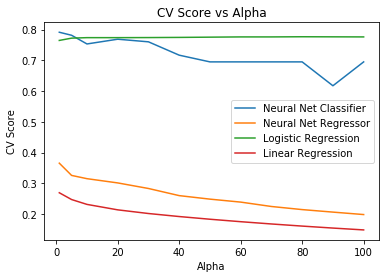

In [117]:
#checking_optimal_hyperparameter_accuracy
plt.plot(alpha, cv_scores_list1,label='Neural Net Classifier')
plt.plot(alpha, cv_scores_list2,label='Neural Net Regressor')
plt.plot(alpha, cv_scores_list3,label='Logistic Regression')
plt.plot(alpha, cv_scores_list4,label='Linear Regression')
plt.title('CV Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.legend()
plt.show()

In [99]:
#applying_dimension_reduction_PCA
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
print(pca_data.shape[1])
print(X_scaled.shape[1])

14
14


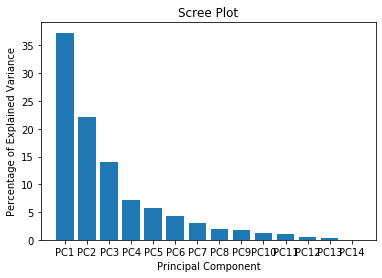

In [100]:
#scree_plot_to_check_most_variation_PC_component
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

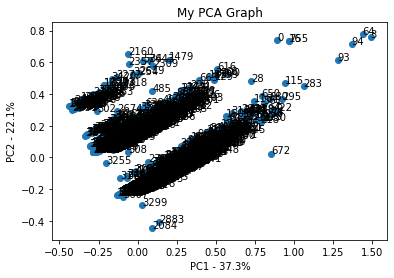

In [101]:
#PCA_graph_for_PC1_PC2
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [102]:
#top_ten_features_for_variance
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_features = sorted_loading_scores[0:10].index.values
 
print(loading_scores[top_10_features])

0     0.622548
12    0.493218
6     0.312187
9     0.264192
5     0.259648
2     0.228673
13    0.191364
1     0.150914
3     0.133233
11    0.050196
dtype: float64


In [103]:
#dimension_reduced_to_6
pca = PCA(n_components=6)
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

In [104]:
#fitting_best_model_on_reduced_feature_set
X_train, X_test, y_train, y_test = train_test_split(pca_data, pred, random_state = 0)

clf4 = MLPClassifier(hidden_layer_sizes = [100,100], alpha = 1, solver = 'lbfgs').fit(X_train, y_train)

score_train = clf4.score(X_train, y_train)

score_test = clf4.score(X_test, y_test)

print(score_train)
print(score_test)

0.7762784090909091
0.751863684771033
